In [126]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import numpy as np
import matplotlib
import matplotlib.cm as cm


In [185]:
source_dir = '/mnt/c/Users/natra/Documents/Research/Iraq-post-conflict-rebel-governance'
index_dir = source_dir + "/data/satellite_indices/evi/evi_mask_mean_max_min"
geo_dir = source_dir + "/data/geo_boundaries/irq-administrative-divisions-shapefiles"
drought_dir = source_dir + "/data/drought/gebrechorkos_etal_2023_spei/spei_sums/"

In [42]:
adm3_file = geo_dir + "/irq_admbnda_adm3_cso_20190603.shp"
adm0_file = geo_dir + "/irq_admbnda_adm0_cso_itos_20190603.shp"
adm3 = gpd.read_file(adm3_file)
adm0 = gpd.read_file(adm0_file)

adm3_filt = adm3.loc[:,("Shape_Area",'ADM3_EN','ADM3_PCODE',
                                    'ADM2_EN','ADM2_PCODE','ADM1_EN','ADM1_PCODE',
                                    'geometry')]

### Drought
#### Combine Drought Files

In [23]:
test = "CHIRPS_GLEAM_01_spei_sums.csv"
test.split("_",3)

['CHIRPS', 'GLEAM', '01', 'spei_sums.csv']

In [37]:
dfs = []
for file in os.listdir(drought_dir):
    print(file)
    file_path = f"{drought_dir}/{file}"
    df = pd.read_csv(file_path, index_col=None)
    file_parts = file.split("_",3)
    df['index_type'] = f"{file_parts[0]}_{file_parts[1]}"
    df['index_period'] = file_parts[2]
    dfs.append(df)

full_df = pd.concat(dfs, axis=0, ignore_index=True)
full_df['time'] = full_df['time'].str.slice(stop=10)
full_df['time'] = pd.to_datetime(full_df['time'])

CHIRPS_GLEAM_01_spei_sums.csv
CHIRPS_GLEAM_03_spei_sums.csv
CHIRPS_GLEAM_06_spei_sums.csv
CHIRPS_hPET_01_spei_sums.csv
CHIRPS_hPET_03_spei_sums.csv
CHIRPS_hPET_06_spei_sums.csv
MSWEP_GLEAM_01_spei_sums.csv
MSWEP_GLEAM_03_spei_sums.csv
MSWEP_GLEAM_06_spei_sums.csv
MSWEP_hPET_01_spei_sums.csv
MSWEP_hPET_03_spei_sums.csv
MSWEP_hPET_06_spei_sums.csv


In [39]:
full_df.head()

,time,region,mean_spei,max_spei,min_spei,num_drought,num_all,ADM3_EN,ADM3_PCODE,index_type,index_period
0,2001-01-01,0,0.361343,0.403181,0.304849,0,6,Abi Gharaq,IQG07Q02N02,CHIRPS_GLEAM,01
1,2001-02-01,0,0.189673,0.218109,0.140766,0,6,Abi Gharaq,IQG07Q02N02,CHIRPS_GLEAM,01
2,2001-03-01,0,-0.196174,-0.156919,-0.225723,0,6,Abi Gharaq,IQG07Q02N02,CHIRPS_GLEAM,01
3,2001-04-01,0,-0.016110,0.026572,-0.080738,0,6,Abi Gharaq,IQG07Q02N02,CHIRPS_GLEAM,01
4,2001-05-01,0,-2.212982,-2.167517,-2.269561,6,6,Abi Gharaq,IQG07Q02N02,CHIRPS_GLEAM,01


In [44]:
tikrit_df = adm3_filt[adm3_filt['ADM2_EN']=='Tikrit']
tikrit_df['ADM3_EN']

8         Al-Alam
286    Um Al-Qura
Name: ADM3_EN, dtype: object

In [56]:
al_alam_spei = full_df[full_df['ADM3_EN']=='Al-Alam']
al_alam_spei = al_alam_spei.set_index('time')

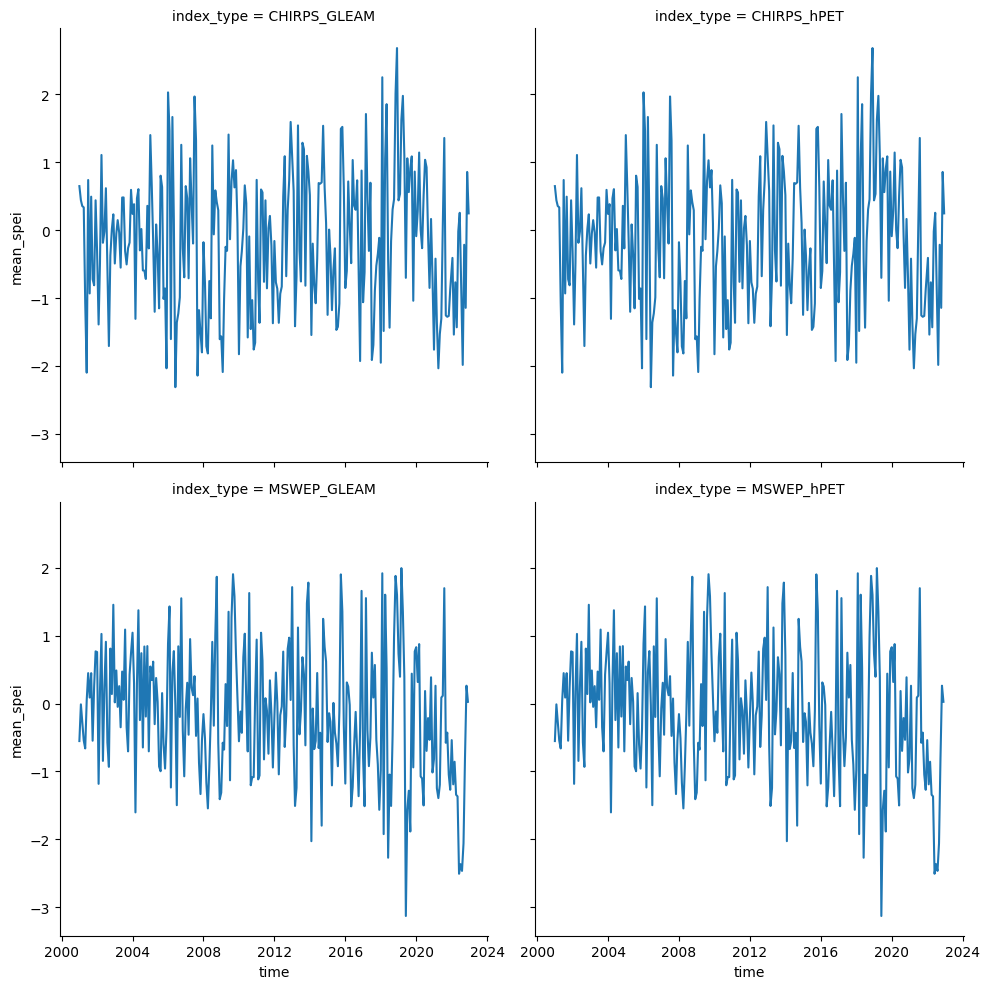

In [61]:
al_alam_03 = al_alam_spei[al_alam_spei['index_period']=='03']
#fig, ax = plt.subplots(2,2,figsize=(12,12))

#for idx_type, df in al_alam_03.groupby('index_type'):
sns.relplot(data=al_alam_03,x='time',y='mean_spei', col='index_type',col_wrap=2,kind='line')

#### CHIRPS GLEAM

In [68]:
chirps_gleam_spei = full_df[full_df['index_type']=='CHIRPS_GLEAM']
chirps_gleam_mar = chirps_gleam_spei[chirps_gleam_spei['time'].dt.month == 3]
chirps_gleam_mar_03 = chirps_gleam_mar[chirps_gleam_mar['index_period']=='03']

chirps_gleam_mar_03 = chirps_gleam_mar_03.merge(adm3_filt.loc[:,('ADM3_EN','geometry')],on="ADM3_EN")
chirps_gleam_mar_03 = gpd.GeoDataFrame(chirps_gleam_mar_03, geometry='geometry')

<Axes: >

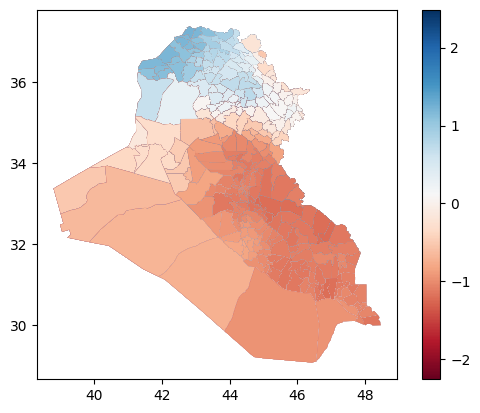

In [71]:
chirps_gleam_mar_03.plot(column='mean_spei',cmap="RdBu",legend=True)

In [150]:
chirps_gleam_spei = full_df[full_df['index_type']=='CHIRPS_GLEAM']
chirps_gleam_03 = chirps_gleam_spei[chirps_gleam_spei['index_period']=='03']
chirps_gleam_03_mon = chirps_gleam_03[chirps_gleam_03['time'].dt.month == 2]

chirps_gleam_03_mon = chirps_gleam_03_mon.merge(adm3_filt.loc[:,('ADM3_EN','geometry')],on="ADM3_EN")
chirps_gleam_03_mon = gpd.GeoDataFrame(chirps_gleam_03_mon, geometry='geometry')

Text(0.5, 0.98, 'CHIRPS GLEAM 3-Month Mean SPEI for February, 2001 - 2022')

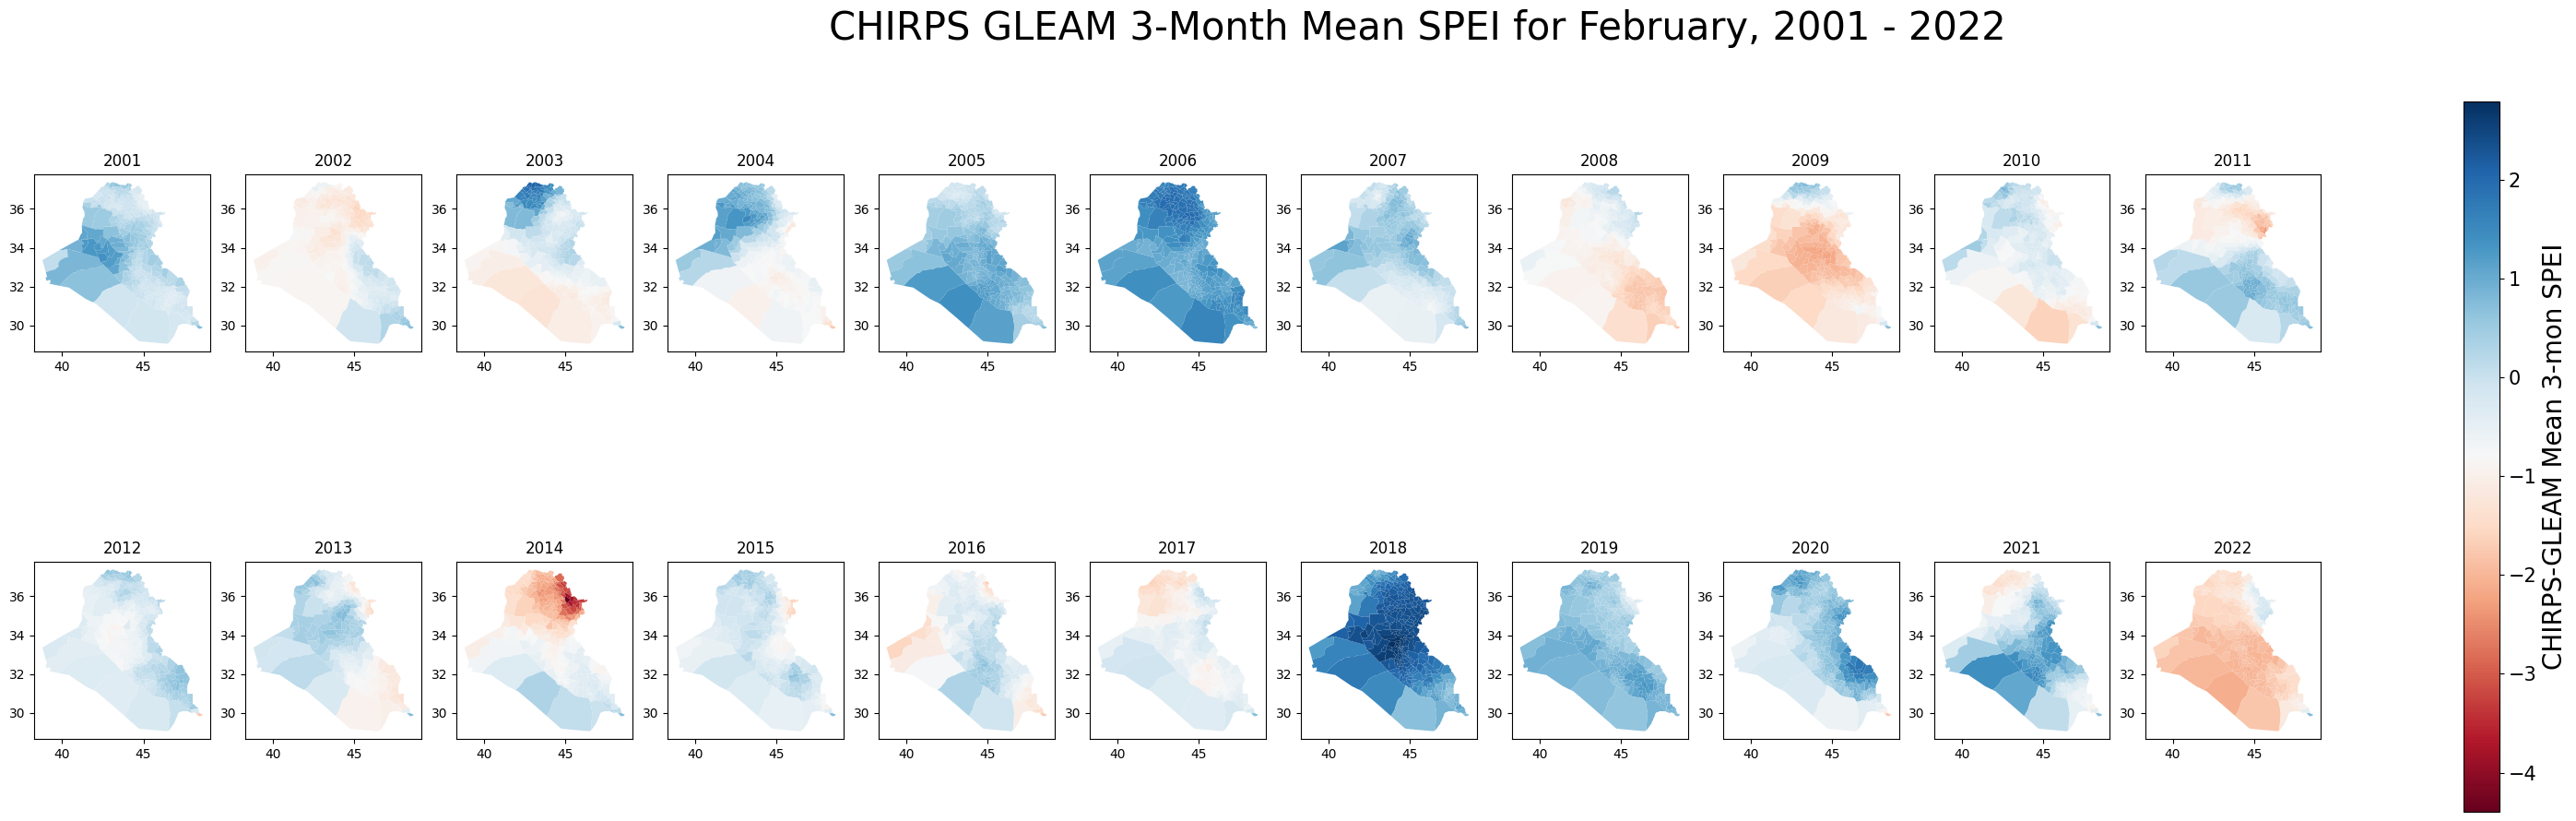

In [151]:
mon_df = chirps_gleam_03_mon
figs, axes = plt.subplots(2,11,figsize=(40,10))
norm = matplotlib.colors.Normalize(vmin=mon_df.mean_spei.min(), 
                                   vmax=mon_df.mean_spei.max())

cmap = "RdBu"

for i, yr in enumerate(np.unique(mon_df.time.values)):
    #print(i,yr)
    if i < 11:
        ax = axes[0][i]
    else:
        ax = axes[1][i-11]

    mon_df[mon_df.time==yr].plot(column='mean_spei',ax=ax,
                                                norm=norm,
                                                cmap=cmap
                                                #,legend=True
                                                )
    ax.set_title(pd.to_datetime(yr).year)
  
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm,ax=axes.ravel().tolist(),orientation='vertical')
cbar.ax.tick_params(labelsize=15)
cbar.set_label(label='CHIRPS-GLEAM Mean 3-mon SPEI',size=20)
figs.suptitle("CHIRPS GLEAM 3-Month Mean SPEI for February, 2001 - 2022",fontsize=30)

In [163]:
chirps_gleam_03_season = chirps_gleam_03[chirps_gleam_03['time'].dt.month.isin([2,3,4])]
chirps_gleam_03_season['year'] = chirps_gleam_03['time'].dt.year
chirps_gleam_03_season

/tmp/ipykernel_25638/3185554926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chirps_gleam_03_season['year'] = chirps_gleam_03['time'].dt.year


,time,region,mean_spei,max_spei,min_spei,num_drought,num_all,ADM3_EN,ADM3_PCODE,index_type,index_period,year
77617,2001-02-01,0,0.189673,0.218109,0.140766,0,6,Abi Gharaq,IQG07Q02N02,CHIRPS_GLEAM,03,2001
77618,2001-03-01,0,-0.196174,-0.156919,-0.225723,0,6,Abi Gharaq,IQG07Q02N02,CHIRPS_GLEAM,03,2001
77619,2001-04-01,0,-0.016110,0.026572,-0.080738,0,6,Abi Gharaq,IQG07Q02N02,CHIRPS_GLEAM,03,2001
77629,2002-02-01,0,-1.009400,-0.994534,-1.017949,5,6,Abi Gharaq,IQG07Q02N02,CHIRPS_GLEAM,03,2002
77630,2002-03-01,0,-0.689977,-0.628450,-0.755456,0,6,Abi Gharaq,IQG07Q02N02,CHIRPS_GLEAM,03,2002
...,...,...,...,...,...,...,...,...,...,...,...,...
155210,2021-03-01,293,-0.766759,-0.515805,-0.994805,0,55,Zummar,IQG15Q08N03,CHIRPS_GLEAM,03,2021
155211,2021-04-01,293,-2.149844,-2.021060,-2.280401,55,55,Zummar,IQG15Q08N03,CHIRPS_GLEAM,03,2021
155221,2022-02-14,293,-1.448030,-1.261416,-1.566988,55,55,Zummar,IQG15Q08N03,CHIRPS_GLEAM,03,2022
155222,2022-03-16,293,1.094536,1.317775,0.836402,0,55,Zummar,IQG15Q08N03,CHIRPS_GLEAM,03,2022


In [173]:
chirps_gleam_03_season = chirps_gleam_03[chirps_gleam_03['time'].dt.month.isin([2,3,4])]
chirps_gleam_03_season['year'] = chirps_gleam_03_season['time'].dt.year
chirps_gleam_03_season = chirps_gleam_03_season.groupby(['ADM3_EN','year']).agg({"mean_spei":'sum'}).reset_index()

chirps_gleam_03_season = chirps_gleam_03_season.merge(adm3_filt.loc[:,('ADM3_EN','geometry')],on="ADM3_EN")
chirps_gleam_03_season = gpd.GeoDataFrame(chirps_gleam_03_season, geometry='geometry')

/tmp/ipykernel_25638/3780176993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chirps_gleam_03_season['year'] = chirps_gleam_03_season['time'].dt.year


Text(0.5, 0.98, 'CHIRPS GLEAM Cumulative 3-Month Mean SPEI, Feb-Apr, 2001 - 2022')

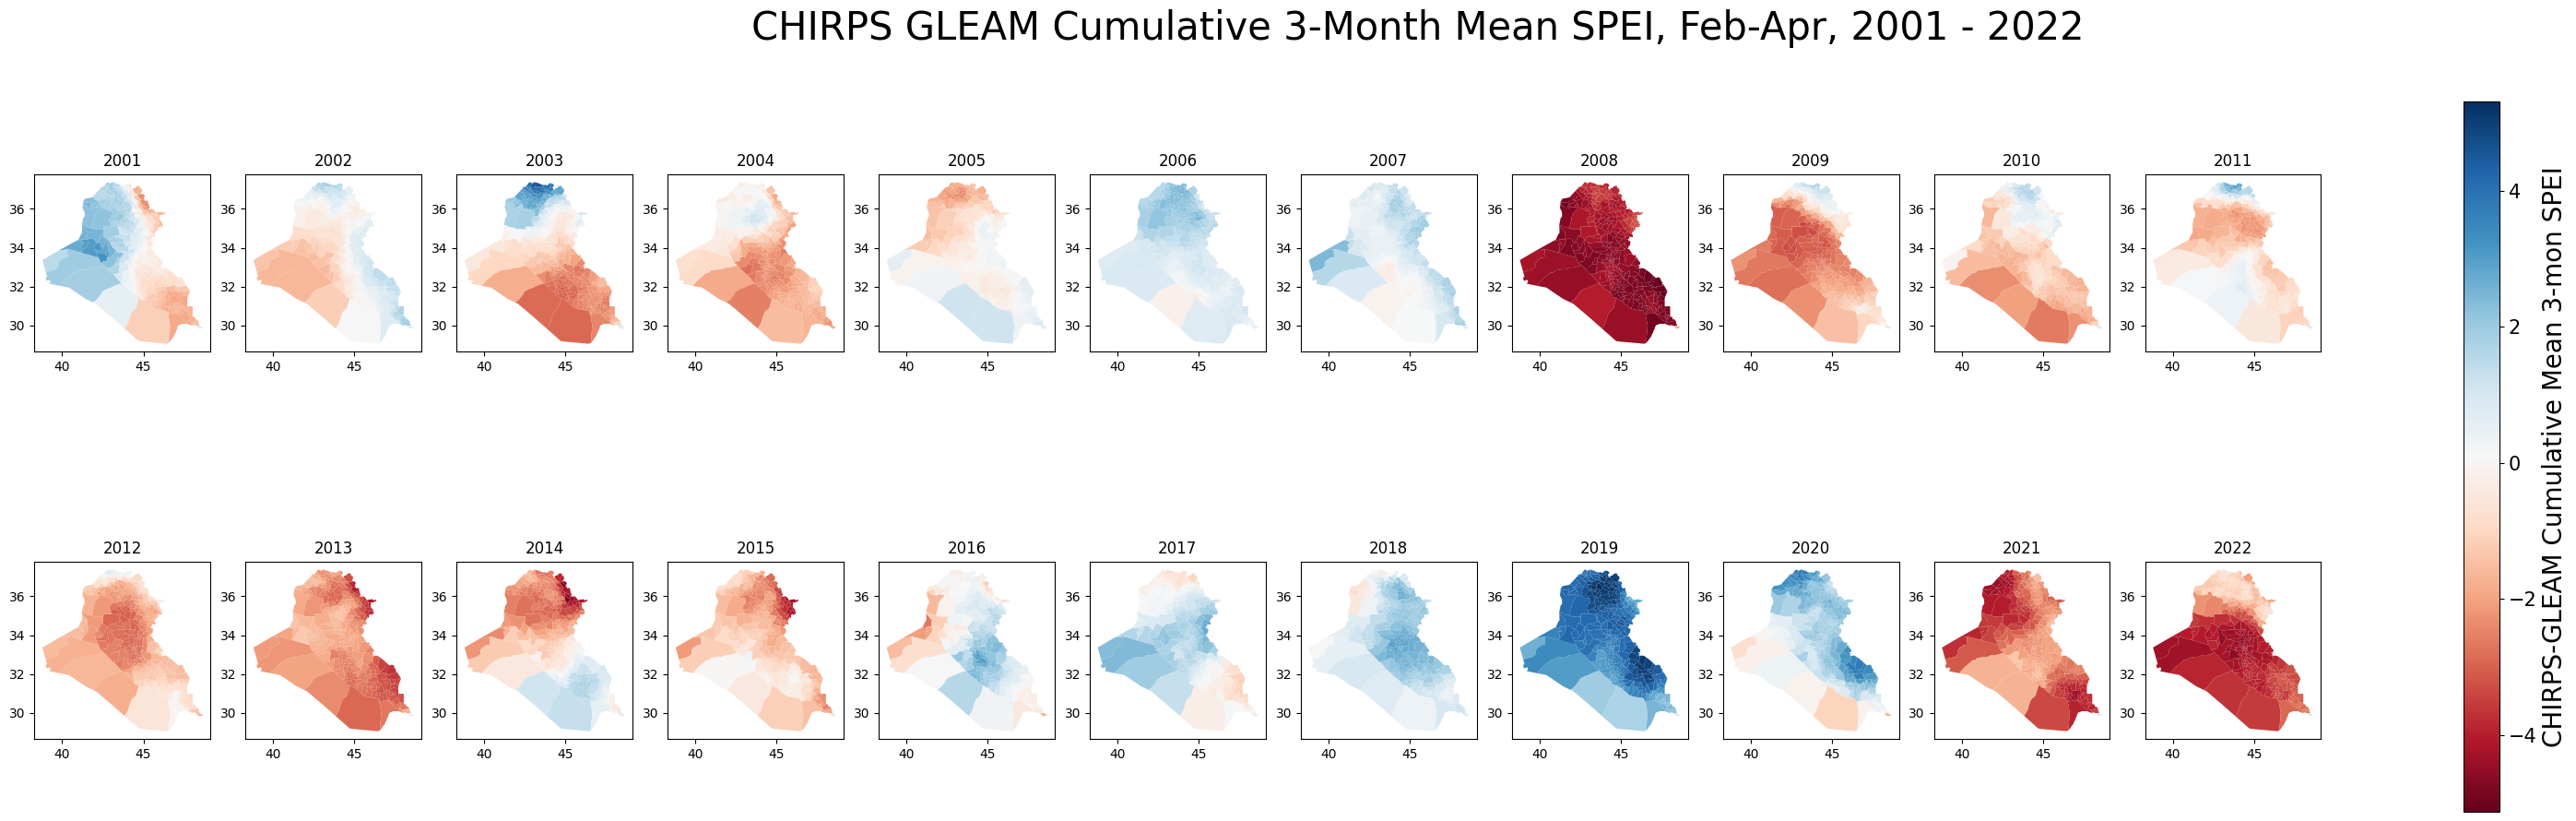

In [174]:
mon_df = chirps_gleam_03_season
figs, axes = plt.subplots(2,11,figsize=(40,10))
norm = matplotlib.colors.Normalize(vmin=mon_df.mean_spei.min(), 
                                   vmax=mon_df.mean_spei.max())

cmap = "RdBu"

for i, yr in enumerate(np.unique(mon_df.year.values)):
    #print(i,yr)
    if i < 11:
        ax = axes[0][i]
    else:
        ax = axes[1][i-11]

    mon_df[mon_df.year==yr].plot(column='mean_spei',ax=ax,
                                                norm=norm,
                                                cmap=cmap
                                                #,legend=True
                                                )
    ax.set_title(yr)
  
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm,ax=axes.ravel().tolist(),orientation='vertical')
cbar.ax.tick_params(labelsize=15)
cbar.set_label(label='CHIRPS-GLEAM Cumulative Mean 3-mon SPEI',size=20)
figs.suptitle("CHIRPS GLEAM Cumulative 3-Month Mean SPEI, Feb-Apr, 2001 - 2022",fontsize=30)

#### MSWEP hPET

In [178]:
mswep_hpet_spei = full_df[full_df['index_type']=='MSWEP_hPET']
mswep_hpet_03 = mswep_hpet_spei[mswep_hpet_spei['index_period']=='03']

mswep_hpet_03_season = mswep_hpet_03[mswep_hpet_03['time'].dt.month.isin([5,6,7])]
mswep_hpet_03_season['year'] = mswep_hpet_03_season['time'].dt.year
mswep_hpet_03_season = mswep_hpet_03_season.groupby(['ADM3_EN','year']).agg({"mean_spei":'sum'}).reset_index()

mswep_hpet_03_season = mswep_hpet_03_season.merge(adm3_filt.loc[:,('ADM3_EN','geometry')],on="ADM3_EN")
mswep_hpet_03_season = gpd.GeoDataFrame(mswep_hpet_03_season, geometry='geometry')

/tmp/ipykernel_25638/1713718358.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mswep_hpet_03_season['year'] = mswep_hpet_03_season['time'].dt.year


Text(0.5, 0.98, 'MSWEP hPET Cumulative 3-Month Mean SPEI, May-Jul, 2001 - 2022')

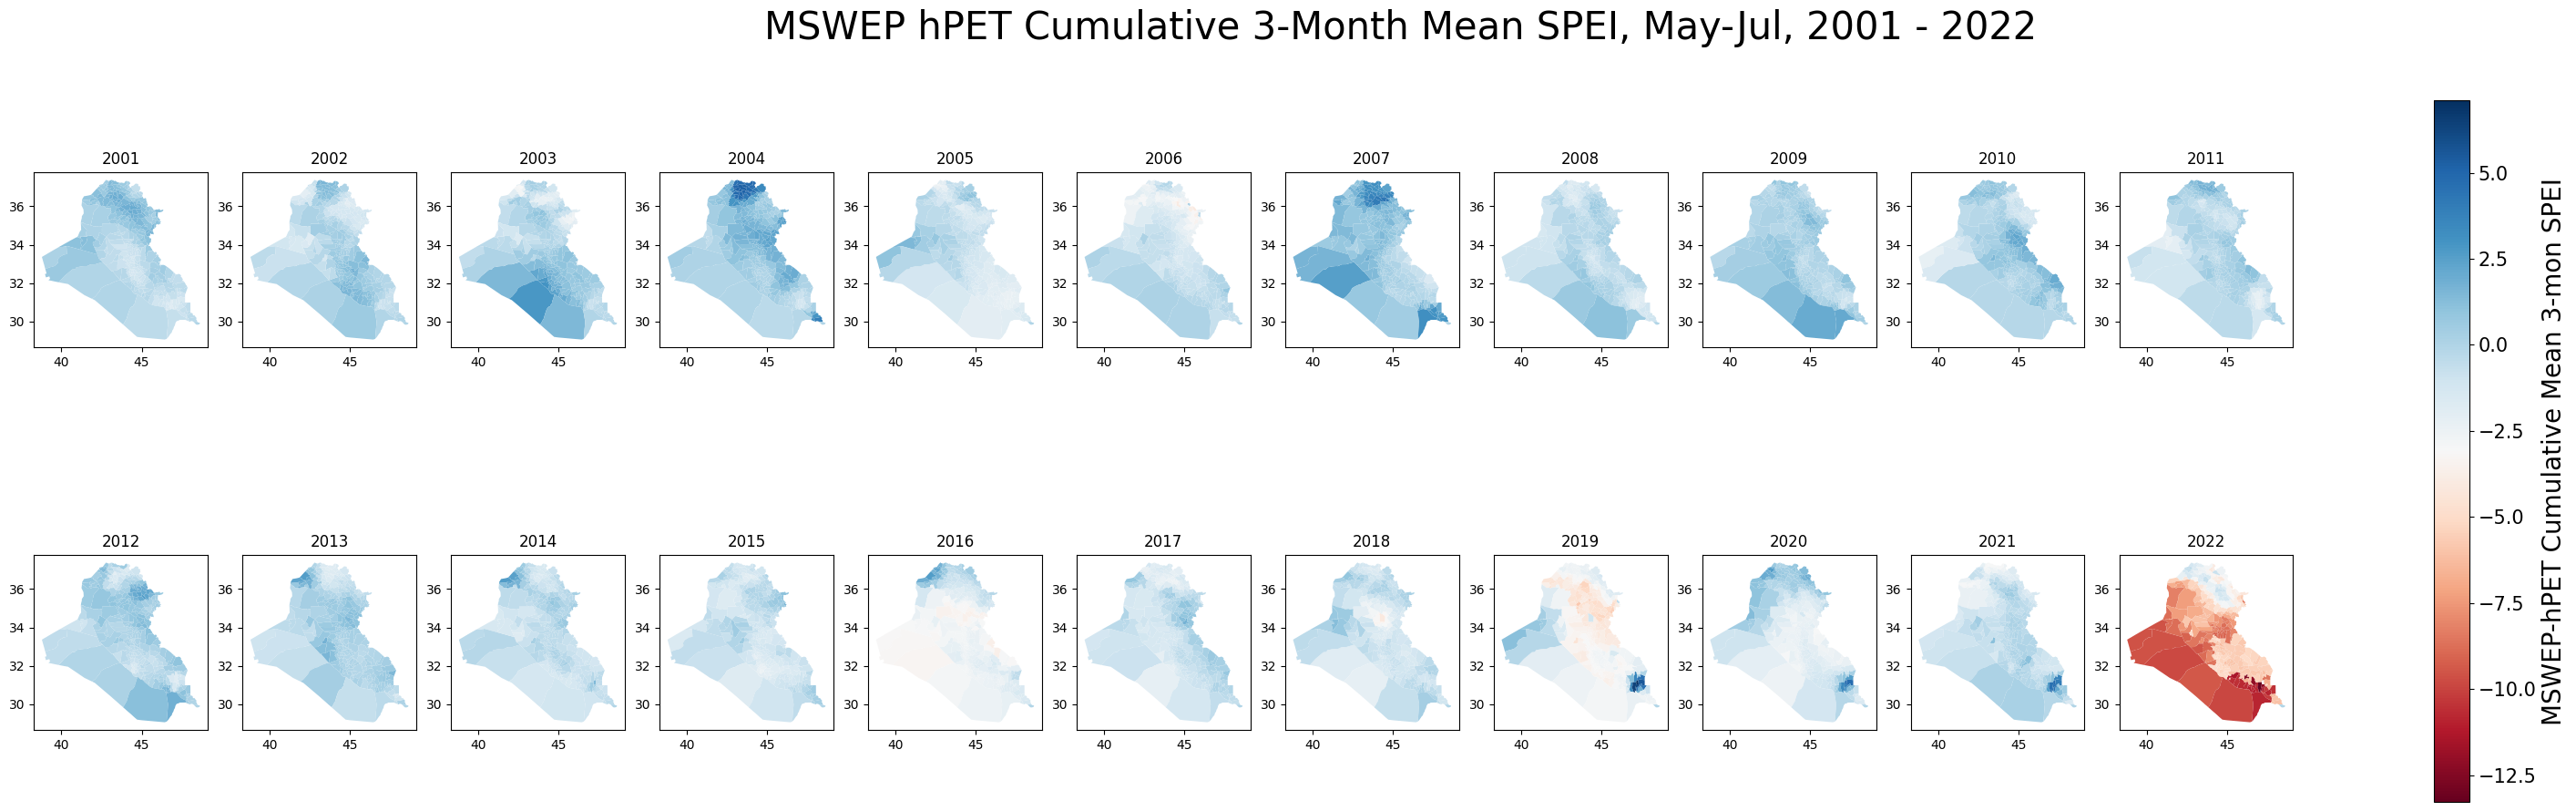

In [179]:
mon_df = mswep_hpet_03_season
figs, axes = plt.subplots(2,11,figsize=(40,10))
norm = matplotlib.colors.Normalize(vmin=mon_df.mean_spei.min(), 
                                   vmax=mon_df.mean_spei.max())

cmap = "RdBu"

for i, yr in enumerate(np.unique(mon_df.year.values)):
    #print(i,yr)
    if i < 11:
        ax = axes[0][i]
    else:
        ax = axes[1][i-11]

    mon_df[mon_df.year==yr].plot(column='mean_spei',ax=ax,
                                                norm=norm,
                                                cmap=cmap
                                                #,legend=True
                                                )
    ax.set_title(yr)
  
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm,ax=axes.ravel().tolist(),orientation='vertical')
cbar.ax.tick_params(labelsize=15)
cbar.set_label(label='MSWEP-hPET Cumulative Mean 3-mon SPEI',size=20)
figs.suptitle("MSWEP hPET Cumulative 3-Month Mean SPEI, May-Jul, 2001 - 2022",fontsize=30)

## EVI

In [186]:
evi_file = index_dir + '/evi_stats_Jan2001-Dec2022.geojson'
evi = gpd.read_file(evi_file)

In [207]:
evi['date'] = pd.to_datetime(evi['date'])
evi['month_start'] = evi['date'].dt.year.astype(str) + "-" + evi['date'].dt.month.astype(str) + "-01"

In [234]:
# use mean if using mean_evi, use max is using max_evi
#evi_agg_monthly = evi.groupby(['month_start','geometry','ADM3_EN'])['mean_evi_scaled'].mean().reset_index()
evi_agg_monthly = evi.groupby(['month_start','geometry','ADM3_EN'])['max_evi_scaled'].max().reset_index()

evi_agg_monthly['month_start'] = pd.to_datetime(evi_agg_monthly['month_start'])
evi_agg_monthly = gpd.GeoDataFrame(evi_agg_monthly,geometry='geometry')

Text(0.5, 0.98, 'Monthly Max EVI for February, 2001 - 2022')

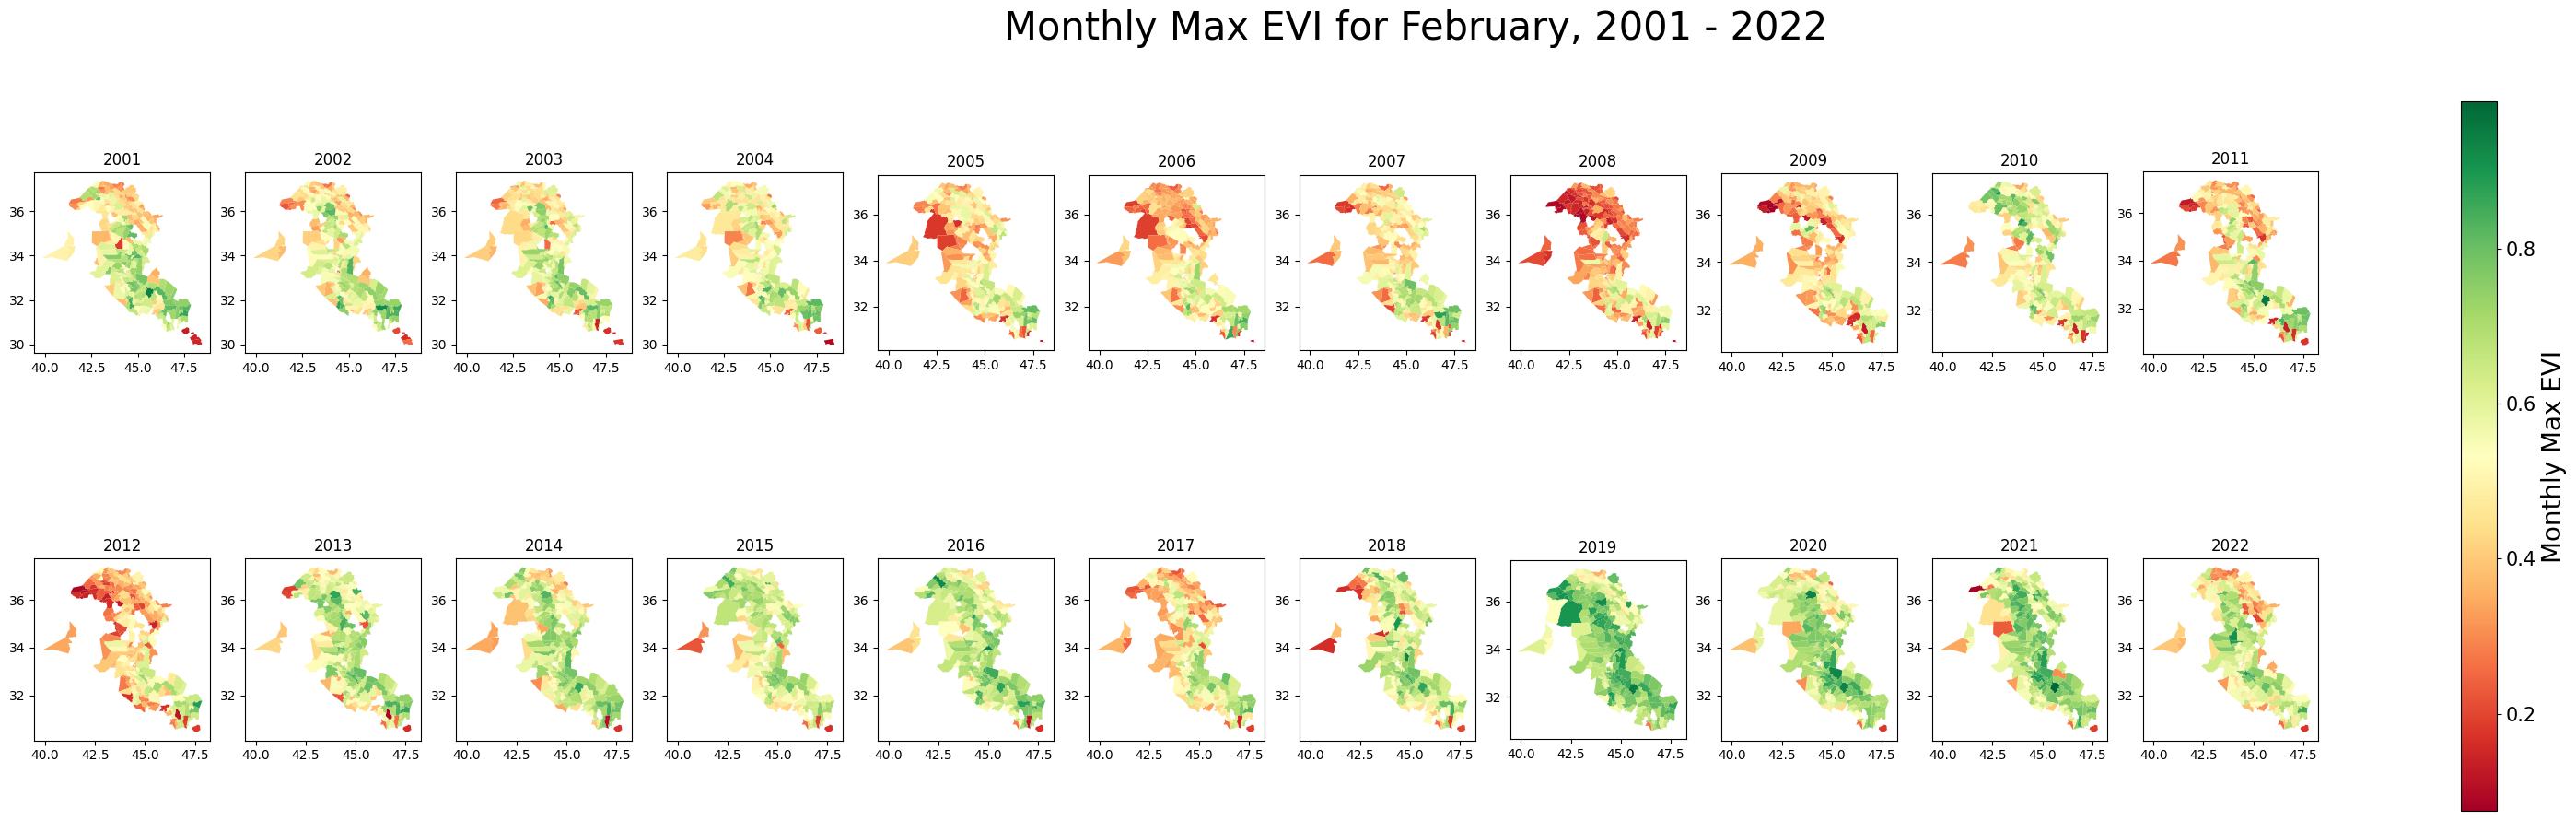

In [240]:
evi_agg_mon = evi_agg_monthly[evi_agg_monthly['month_start'].dt.month == 2]

mon_df = evi_agg_mon
figs, axes = plt.subplots(2,11,figsize=(40,10))
norm = matplotlib.colors.Normalize(vmin=mon_df.max_evi_scaled.min(), 
                                   vmax=mon_df.max_evi_scaled.max())

cmap = "RdYlGn"

for i, yr in enumerate(np.unique(mon_df.month_start.values)):
    #print(i,yr)
    if i < 11:
        ax = axes[0][i]
    else:
        ax = axes[1][i-11]

    mon_df[mon_df.month_start==yr].plot(column='max_evi_scaled',ax=ax,
                                                norm=norm,
                                                cmap=cmap
                                                #,legend=True
                                                )
    ax.set_title(pd.to_datetime(yr).year)
  
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm,ax=axes.ravel().tolist(),orientation='vertical')
cbar.ax.tick_params(labelsize=15)
cbar.set_label(label='Monthly Max EVI',size=20)
figs.suptitle("Monthly Max EVI for February, 2001 - 2022",fontsize=30)